In [15]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
from matplotlib import rcParams
rcParams["savefig.dpi"] = 150
rcParams["figure.dpi"] = 150
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter

from astropy.stats import LombScargle

from lightkurve import KeplerLightCurveFile
from lightkurve import Periodogram

target = "KIC11615890"
lc = KeplerLightCurveFile.from_archive(target, quarter=0).PDCSAP_FLUX.normalize()
for q in range(1, 17):
    lc = lc.append(KeplerLightCurveFile.from_archive(target, quarter=q).PDCSAP_FLUX.normalize())
    
pd = Periodogram.from_lightcurve(lc)

In [36]:
pd.set_power()

In [37]:
pd.power

array([0.11453146, 1.24476769, 0.16738258, ..., 0.11504704, 0.64011731,
       0.38941489])

In [26]:
pd.power *= 1e-6 * 24 * 60 * 60

In [27]:
pd.power

array([0.86810076, 0.97729422, 0.69310811, ..., 0.01149201, 0.01766446,
       0.02463739])

In [38]:
pd.power = pd.model.autopower(minimum_frequency=pd.frequency[0].value, maximum_frequency=pd.frequency[-1].value)

In [39]:
pd.power

(array([  1.        ,   1.00013914,   1.00027828, ..., 299.99977259,
        299.99991173, 300.00005087]),
 array([4.43475769e-06, 2.16588888e-05, 4.26512222e-05, ...,
        1.48285713e-05, 1.52474428e-05, 1.30280508e-05]))

ValueError: x and y must have same first dimension, but have shapes (100000,) and (2, 2148945)

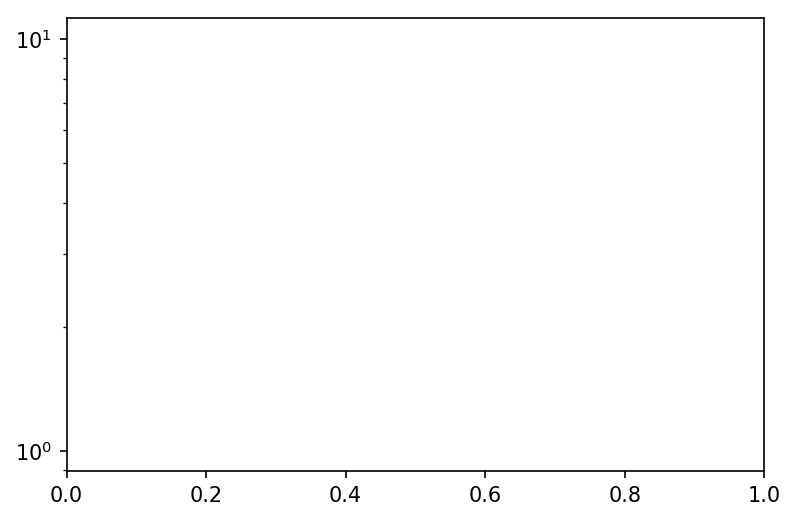

In [40]:
pd.plot()

In [41]:
len(pd.t)

52746

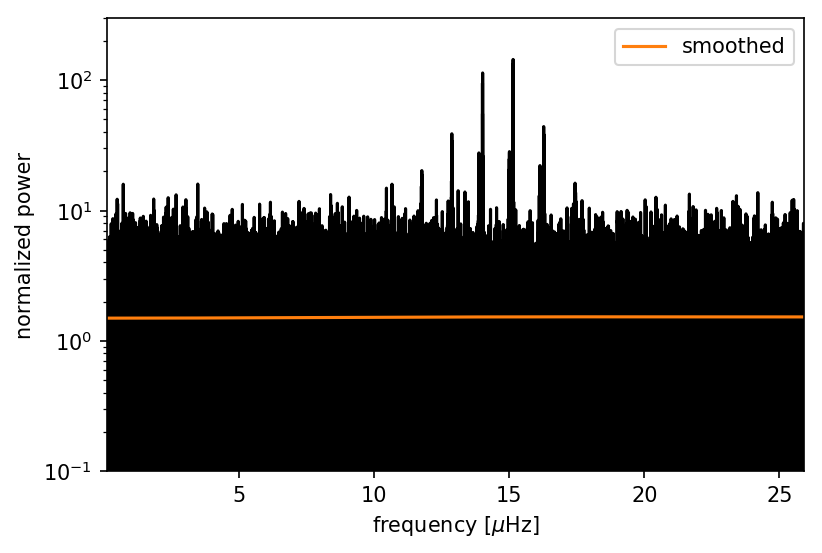

In [19]:
pd.normalized_plot()